In [69]:
# step 1. change to relevant data types done
# step 2. removing irrelevant columns done
# step 3. removing duplicated columns done
# step 4. removing incorrect rows done
# step 5. removing duplicated rows done
# step 6. filling null values done
# step 7. feature encoding done
# step 8. drop highly positive corr features
# step 9. add new columns (feature engineering)
# step 10. handle outliers done
# step 11. handle imbalanced data (SMOTE)
# step 12. feature transformation
# step 13. extract info from textual data
# step 14. feature scaling


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df=pd.read_csv("C:/Users/abhis/OneDrive/Desktop/cafe_sales.csv")

In [72]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    9540 non-null   object
 1   Item              9225 non-null   object
 2   Quantity          9405 non-null   object
 3   Price Per Unit    9375 non-null   object
 4   Total Spent       9383 non-null   object
 5   Payment Method    7101 non-null   object
 6   Location          6422 non-null   object
 7   Transaction Date  9540 non-null   object
dtypes: object(8)
memory usage: 596.4+ KB


In [73]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

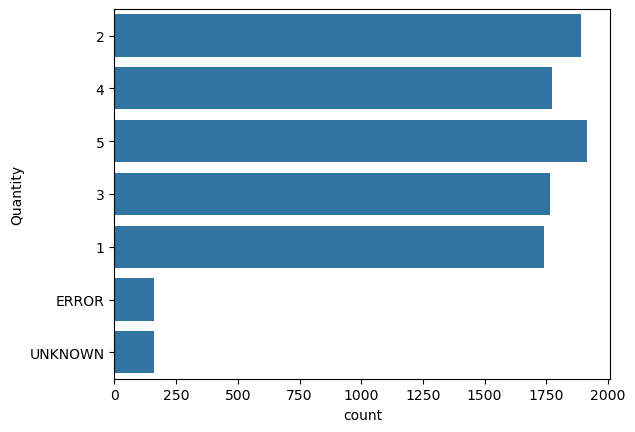

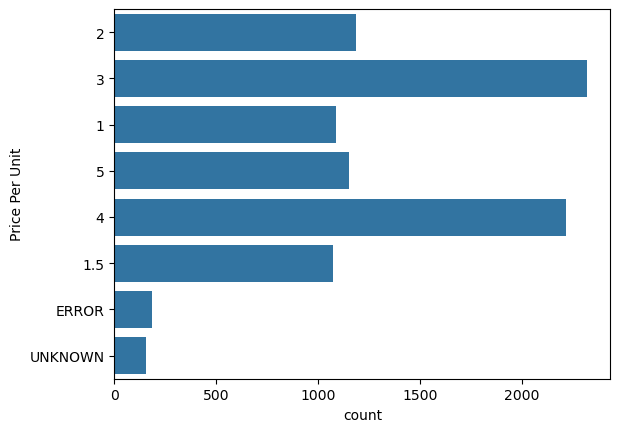

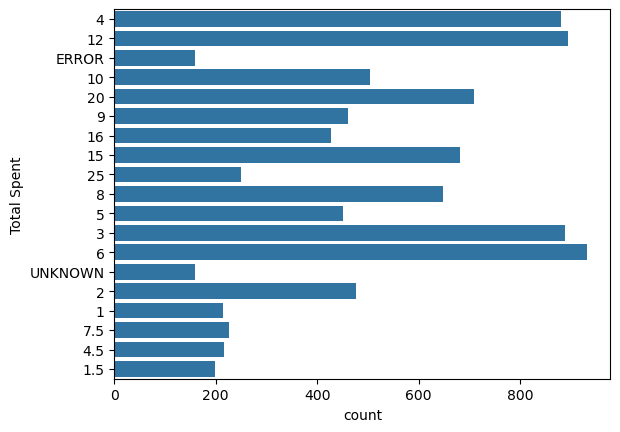

In [74]:
for col_name in df[['Quantity', 'Price Per Unit', 'Total Spent',]].columns:
    sns.countplot(df[col_name])
    plt.show()

In [75]:
def remove_error(col_name):
    df[col_name]=df[col_name].replace('UNKNOWN',np.nan).replace('ERROR',np.nan)  

In [76]:
for col_name in df[['Quantity', 'Price Per Unit', 'Total Spent',]].columns:
    remove_error(col_name)

In [77]:
for col_name in df[['Quantity', 'Price Per Unit', 'Total Spent',]].columns:
    df[col_name]=df[col_name].astype(float)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9540 non-null   object 
 1   Item              9225 non-null   object 
 2   Quantity          9086 non-null   float64
 3   Price Per Unit    9034 non-null   float64
 4   Total Spent       9064 non-null   float64
 5   Payment Method    7101 non-null   object 
 6   Location          6422 non-null   object 
 7   Transaction Date  9540 non-null   object 
dtypes: float64(3), object(5)
memory usage: 596.4+ KB


In [79]:
for i in df['Transaction Date']:
    if i=='UNKNOWN' or i=='ERROR':
        print('yes')
    else:
        print('no')
remove_error('Transaction Date')              

no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
n

In [80]:
df['Transaction Date']=pd.to_datetime(df['Transaction Date'], format='%d-%m-%Y')

In [81]:
df.duplicated().sum()

np.int64(0)

In [82]:
df.isnull().sum()

Transaction ID         0
Item                 315
Quantity             454
Price Per Unit       506
Total Spent          476
Payment Method      2439
Location            3118
Transaction Date       0
dtype: int64

In [83]:
df.groupby('Item')['Quantity'].median()

Item
Cake        3.0
Coffee      3.0
Cookie      3.0
ERROR       3.0
Juice       3.0
Salad       3.0
Sandwich    3.0
Smoothie    3.0
Tea         3.0
UNKNOWN     3.0
Name: Quantity, dtype: float64

In [84]:
remove_error('Item')

In [85]:
df['Quantity']=df['Quantity'].fillna(3)

In [86]:
for i in df['Item'].unique():
    print(i)

Coffee
Cake
Cookie
Salad
Smoothie
nan
Sandwich
Juice
Tea


In [87]:
menu={}
for i in df['Item'].dropna().unique():
    print(i,df['Price Per Unit'][df['Item']==i].iloc[0])
    menu[i]=df['Price Per Unit'][df['Item']==i].iloc[0]

Coffee 2.0
Cake 3.0
Cookie 1.0
Salad 5.0
Smoothie 4.0
Sandwich 4.0
Juice 3.0
Tea 1.5


In [88]:
df['Total Spent']= df['Quantity']* df['Price Per Unit']

In [89]:
new_menu={}
for i,j in menu.items():
    new_menu[j]=i

In [90]:
for i in df[df['Item'].isnull()].index:
    try:
        item_name=new_menu[df['Price Per Unit'][i]]
        df['Item'][i]=item_name
    except KeyError:
        pass

C:\Users\abhis\AppData\Local\Temp\ipykernel_4132\2901857816.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Item'][i]=item_name
C:\Users\abhis\AppData\Local\Temp\ipykernel_4132\2901857816.py:4: SettingWithCopyWarning: 
A value is try

In [91]:
df=df.dropna(subset=['Price Per Unit'])

In [92]:
df.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      2307
Location            2953
Transaction Date       0
dtype: int64

Payment Method


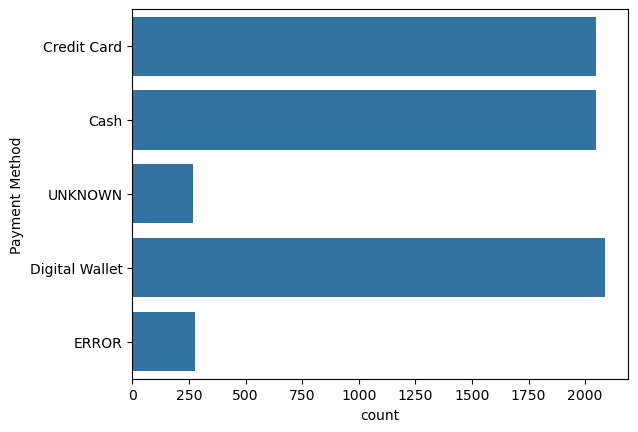

Location


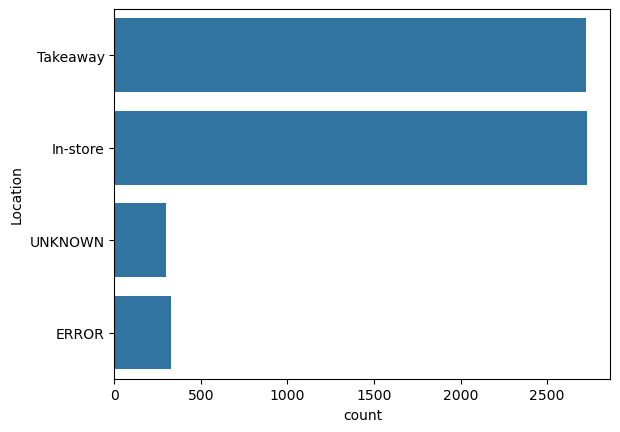

In [93]:
for i in ['Payment Method','Location']:
    print(i)
    sns.countplot(df[i])
    plt.show()

In [94]:
df['Payment Method']=df['Payment Method'].str.replace('ERROR','UNKNOWN')

In [95]:
df['Location']=df['Location'].str.replace('ERROR','UNKNOWN')

In [96]:
df['Payment Method']=df['Payment Method'].fillna('UNKNOWN')
df['Location']=df['Location'].fillna('UNKNOWN')

In [97]:
(df.isnull().sum()/len(df))*100

Transaction ID      0.0
Item                0.0
Quantity            0.0
Price Per Unit      0.0
Total Spent         0.0
Payment Method      0.0
Location            0.0
Transaction Date    0.0
dtype: float64

In [98]:
df.dropna(inplace=True)

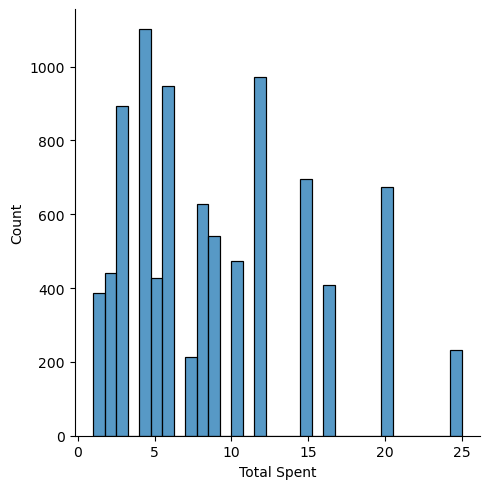

In [99]:
sns.displot(df['Total Spent'])

In [100]:
np.log10(10000)

np.float64(4.0)